# Mobile Price Classification using Logistic Regression

In [98]:
# Importing the required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
# Reading the dataset
data_set = pd.read_csv("train.csv")
data_set.shape

(2000, 21)

In [100]:
# Splitting the input features and target variable in the dataset (last column is the target variable)
X = data_set.iloc[:, :-1]
y = data_set.iloc[:, -1]

## Without Normalization

In [101]:
# Splitting the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### L1 Penalty

#### Determining the best value of C

In [102]:
# Define a range of C values
C_values = np.logspace(-2, 2, 50)

# Lists to store the performance metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

In [103]:
# Perform cross-validation for each value of C
for C in C_values:
    lr_classifier = LogisticRegression(max_iter=500, random_state=42, C=C, penalty='l1', solver='liblinear')
    
    accuracy_cv = cross_val_score(lr_classifier, X_train, y_train, cv=5, scoring='accuracy')
    precision_cv = cross_val_score(lr_classifier, X_train, y_train, cv=5, scoring='precision_macro')
    recall_cv = cross_val_score(lr_classifier, X_train, y_train, cv=5, scoring='recall_macro')
    f1score_cv = cross_val_score(lr_classifier, X_train, y_train, cv=5, scoring='f1_macro')
    
    accuracy_scores.append(np.mean(accuracy_cv))
    precision_scores.append(np.mean(precision_cv))
    recall_scores.append(np.mean(recall_cv))
    f1_scores.append(np.mean(f1score_cv))

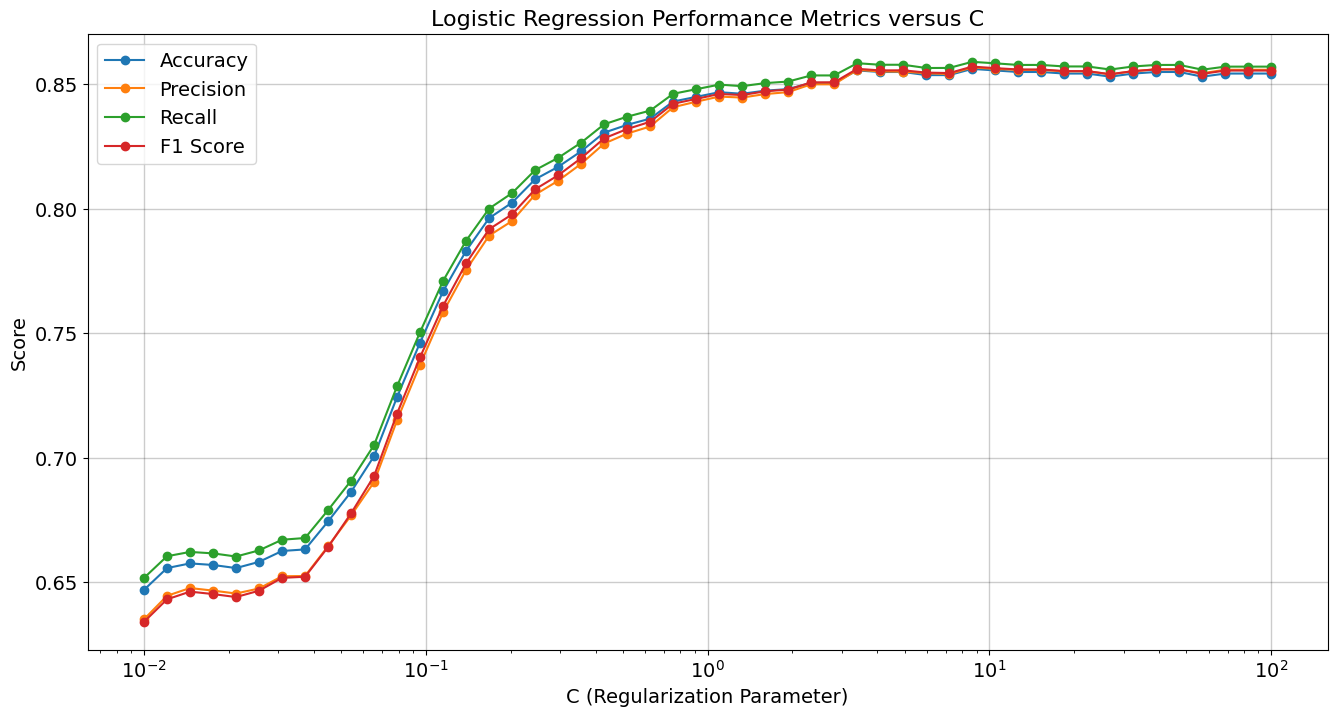

In [104]:
# Plot the results
plt.figure(figsize=(16,8))

plt.plot(C_values, accuracy_scores, label='Accuracy', marker='o')
plt.plot(C_values, precision_scores, label='Precision', marker='o')
plt.plot(C_values, recall_scores, label='Recall', marker='o')
plt.plot(C_values, f1_scores, label='F1 Score', marker='o')

plt.xscale('log')
plt.xlabel('C (Regularization Parameter)',color='black',fontsize=14)
plt.ylabel('Score',color='black',fontsize=14)
plt.title('Logistic Regression Performance Metrics versus C',color='black',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14, ncol=1, loc="upper left")
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

In [105]:
best_C1_ind = accuracy_scores.index(max(accuracy_scores))
best_C2_ind = precision_scores.index(max(precision_scores))
best_C3_ind = recall_scores.index(max(recall_scores))
best_C4_ind = f1_scores.index(max(f1_scores))

best_C = C_values[max(best_C1_ind,best_C2_ind,best_C3_ind,best_C4_ind)]
best_C

8.68511373751352

In [106]:
# Logistic Regression
lr_classifier1 = LogisticRegression(max_iter=500, random_state=42, C=best_C, penalty='l1', solver='liblinear')

In [107]:
# Cross-validation and its performance metrics
accuracy_cv1 = cross_val_score(lr_classifier1, X_train, y_train, cv=5, scoring='accuracy')
precision_cv1 = cross_val_score(lr_classifier1, X_train, y_train, cv=5, scoring='precision_macro')
recall_cv1 = cross_val_score(lr_classifier1, X_train, y_train, cv=5, scoring='recall_macro')
f1score_cv1 = cross_val_score(lr_classifier1, X_train, y_train, cv=5, scoring='f1_macro')

acc_cv1 = round(np.mean(accuracy_cv1)*100,3)
pre_cv1 = round(np.mean(precision_cv1)*100,3)
rec_cv1 = round(np.mean(recall_cv1)*100,3)
f1_cv1 = round(np.mean(f1score_cv1)*100,3)

print('Cross-Validation Accuracy (Without Normalization):',acc_cv1,'%')
print('Cross-Validation Precision (Without Normalization):',pre_cv1,'%')
print('Cross-Validation Recall (Without Normalization):',rec_cv1,'%')
print('Cross-Validation F1 Score (Without Normalization):',f1_cv1,'%')

Cross-Validation Accuracy (Without Normalization): 85.625 %
Cross-Validation Precision (Without Normalization): 85.686 %
Cross-Validation Recall (Without Normalization): 85.909 %
Cross-Validation F1 Score (Without Normalization): 85.716 %


In [108]:
# Making predictions on the test set
lr_classifier1.fit(X_train, y_train)
y_test_pred1 = lr_classifier1.predict(X_test)

In [109]:
# Evaluating the classifier on the test set
accuracy_test1 = accuracy_score(y_test, y_test_pred1)
precision_test1 = precision_score(y_test, y_test_pred1, average='macro')
recall_test1 = recall_score(y_test, y_test_pred1, average='macro')
f1score_test1 = f1_score(y_test, y_test_pred1, average='macro')

acc_tst1 = round(np.mean(accuracy_test1)*100,3)
pre_tst1 = round(np.mean(precision_test1)*100,3)
rec_tst1 = round(np.mean(recall_test1)*100,3)
f1_tst1 = round(np.mean(f1score_test1)*100,3)

print('Test Accuracy (Without Normalization):',acc_tst1,'%')
print('Test Precision (Without Normalization):',pre_tst1,'%')
print('Test Recall (Without Normalization):',rec_tst1,'%')
print('Test F1 Score (Without Normalization):',f1_tst1,'%')

Test Accuracy (Without Normalization): 88.25 %
Test Precision (Without Normalization): 87.505 %
Test Recall (Without Normalization): 87.343 %
Test F1 Score (Without Normalization): 87.384 %


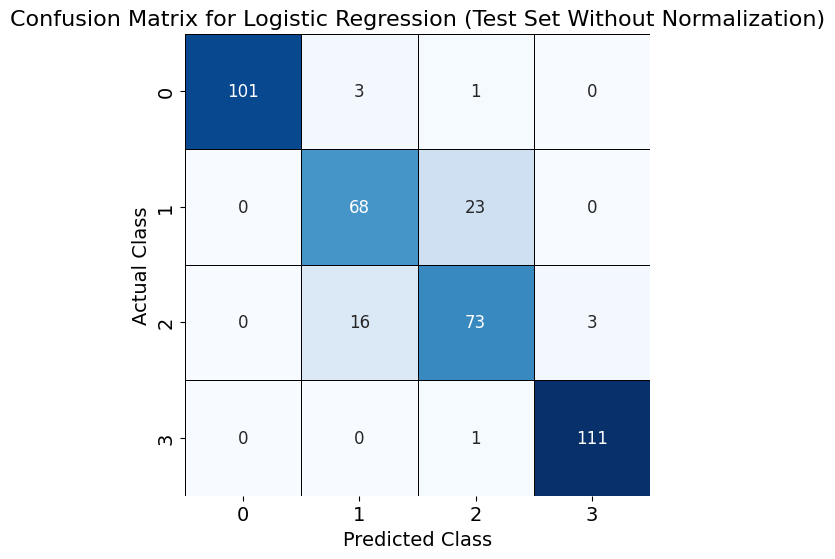

In [110]:
# Generating and plotting the confusion matrix for the test set
conf_matrix_test1 = confusion_matrix(y_test, y_test_pred1)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix_test1, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=lr_classifier1.classes_, yticklabels=lr_classifier1.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for Logistic Regression (Test Set Without Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

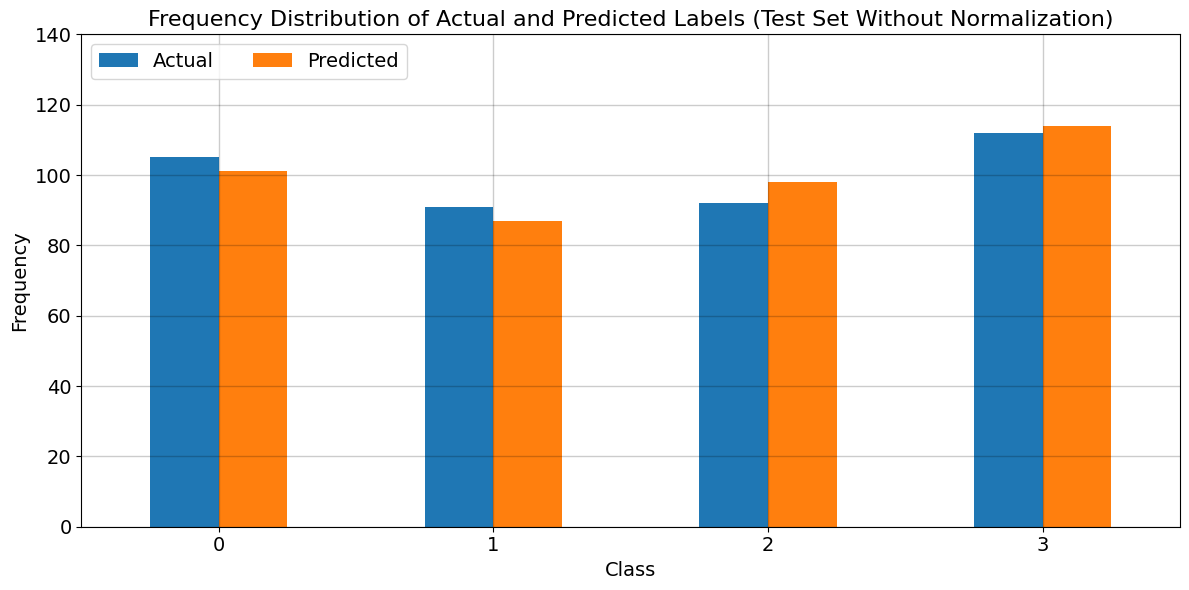

In [111]:
# Plotting the bar graph for frequency distribution of actual and predicted labels (Test Set)
actual_labels_test, actual_counts_test = np.unique(y_test, return_counts=True)
predicted_labels_test1, predicted_counts_test1 = np.unique(y_test_pred1, return_counts=True)

labels_test = np.unique(y_test)

x_test = np.arange(len(labels_test))
width = 0.25

fig, ax = plt.subplots(figsize=(12,6))
rects1_test = ax.bar(x_test - width/2, actual_counts_test, width, label='Actual')
rects2_test = ax.bar(x_test + width/2, predicted_counts_test1, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (Test Set Without Normalization)', color='black', fontsize=16)
ax.set_xticks(x_test)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper left")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels_test) - 0.5]) 
plt.ylim((0,140))
fig.tight_layout()
plt.show()

### L2 Penalty

#### Determining the best value of C

In [112]:
# Lists to store the performance metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

In [113]:
# Perform cross-validation for each value of C
for C in C_values:
    lr_classifier = LogisticRegression(max_iter=500, random_state=42, C=C, penalty='l2', solver='liblinear')
    
    accuracy_cv = cross_val_score(lr_classifier, X_train, y_train, cv=5, scoring='accuracy')
    precision_cv = cross_val_score(lr_classifier, X_train, y_train, cv=5, scoring='precision_macro')
    recall_cv = cross_val_score(lr_classifier, X_train, y_train, cv=5, scoring='recall_macro')
    f1score_cv = cross_val_score(lr_classifier, X_train, y_train, cv=5, scoring='f1_macro')
    
    accuracy_scores.append(np.mean(accuracy_cv))
    precision_scores.append(np.mean(precision_cv))
    recall_scores.append(np.mean(recall_cv))
    f1_scores.append(np.mean(f1score_cv))

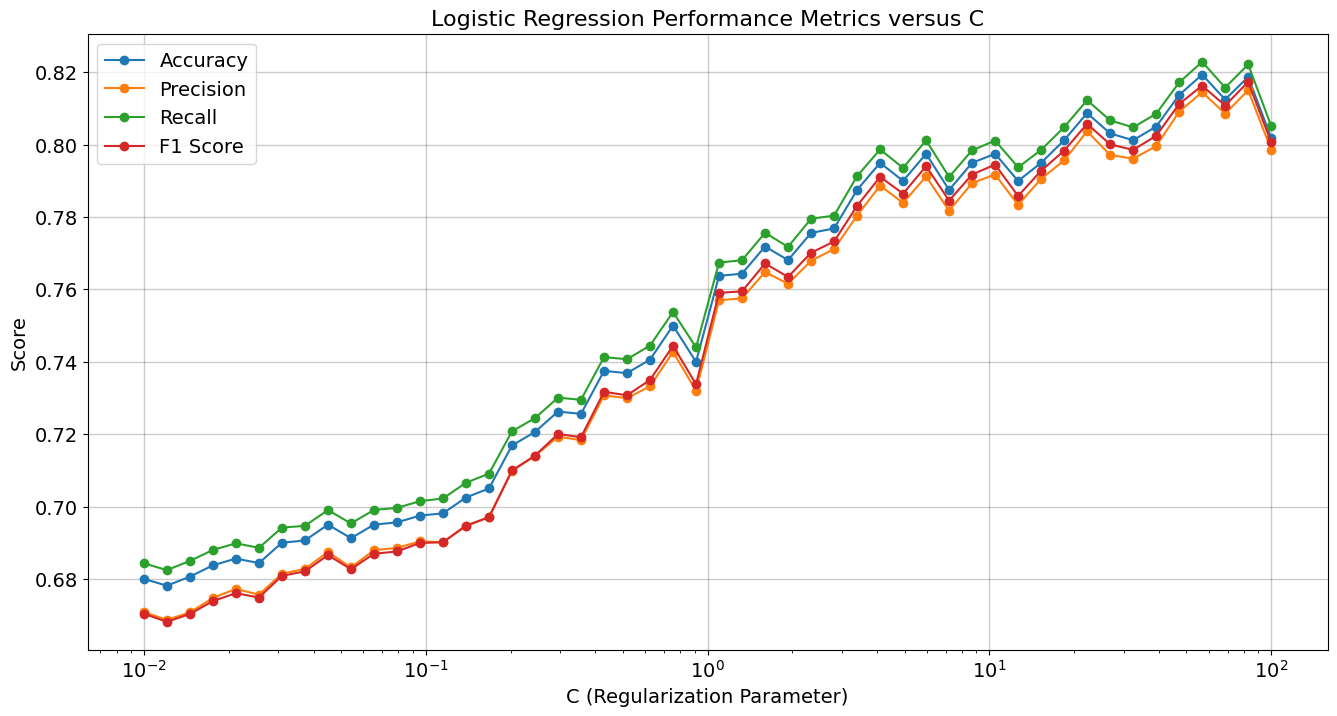

In [114]:
# Plot the results
plt.figure(figsize=(16,8))

plt.plot(C_values, accuracy_scores, label='Accuracy', marker='o')
plt.plot(C_values, precision_scores, label='Precision', marker='o')
plt.plot(C_values, recall_scores, label='Recall', marker='o')
plt.plot(C_values, f1_scores, label='F1 Score', marker='o')

plt.xscale('log')
plt.xlabel('C (Regularization Parameter)',color='black',fontsize=14)
plt.ylabel('Score',color='black',fontsize=14)
plt.title('Logistic Regression Performance Metrics versus C',color='black',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14, ncol=1, loc="upper left")
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

In [115]:
best_C1_ind = accuracy_scores.index(max(accuracy_scores))
best_C2_ind = precision_scores.index(max(precision_scores))
best_C3_ind = recall_scores.index(max(recall_scores))
best_C4_ind = f1_scores.index(max(f1_scores))

best_C = C_values[max(best_C1_ind,best_C2_ind,best_C3_ind,best_C4_ind)]
best_C

56.89866029018293

In [116]:
# Logistic Regression
lr_classifier2 = LogisticRegression(max_iter=500, random_state=42, C=best_C, penalty='l2', solver='liblinear')

In [117]:
# Cross-validation and its performance metrics
accuracy_cv2 = cross_val_score(lr_classifier2, X_train, y_train, cv=5, scoring='accuracy')
precision_cv2 = cross_val_score(lr_classifier2, X_train, y_train, cv=5, scoring='precision_macro')
recall_cv2 = cross_val_score(lr_classifier2, X_train, y_train, cv=5, scoring='recall_macro')
f1score_cv2 = cross_val_score(lr_classifier2, X_train, y_train, cv=5, scoring='f1_macro')

acc_cv2 = round(np.mean(accuracy_cv2)*100,3)
pre_cv2 = round(np.mean(precision_cv2)*100,3)
rec_cv2 = round(np.mean(recall_cv2)*100,3)
f1_cv2 = round(np.mean(f1score_cv2)*100,3)

print('Cross-Validation Accuracy (Without Normalization):',acc_cv2,'%')
print('Cross-Validation Precision (Without Normalization):',pre_cv2,'%')
print('Cross-Validation Recall (Without Normalization):',rec_cv2,'%')
print('Cross-Validation F1 Score (Without Normalization):',f1_cv2,'%')

Cross-Validation Accuracy (Without Normalization): 81.938 %
Cross-Validation Precision (Without Normalization): 81.452 %
Cross-Validation Recall (Without Normalization): 82.292 %
Cross-Validation F1 Score (Without Normalization): 81.633 %


In [118]:
# Making predictions on the test set
lr_classifier2.fit(X_train, y_train)
y_test_pred2 = lr_classifier2.predict(X_test)

In [119]:
# Evaluating the classifier on the test set
accuracy_test2 = accuracy_score(y_test, y_test_pred2)
precision_test2 = precision_score(y_test, y_test_pred2, average='macro')
recall_test2 = recall_score(y_test, y_test_pred2, average='macro')
f1score_test2 = f1_score(y_test, y_test_pred2, average='macro')

acc_tst2 = round(np.mean(accuracy_test2)*100,3)
pre_tst2 = round(np.mean(precision_test2)*100,3)
rec_tst2 = round(np.mean(recall_test2)*100,3)
f1_tst2 = round(np.mean(f1score_test2)*100,3)

print('Test Accuracy (Without Normalization):',acc_tst2,'%')
print('Test Precision (Without Normalization):',pre_tst2,'%')
print('Test Recall (Without Normalization):',rec_tst2,'%')
print('Test F1 Score (Without Normalization):',f1_tst2,'%')

Test Accuracy (Without Normalization): 83.5 %
Test Precision (Without Normalization): 82.037 %
Test Recall (Without Normalization): 82.196 %
Test F1 Score (Without Normalization): 82.041 %


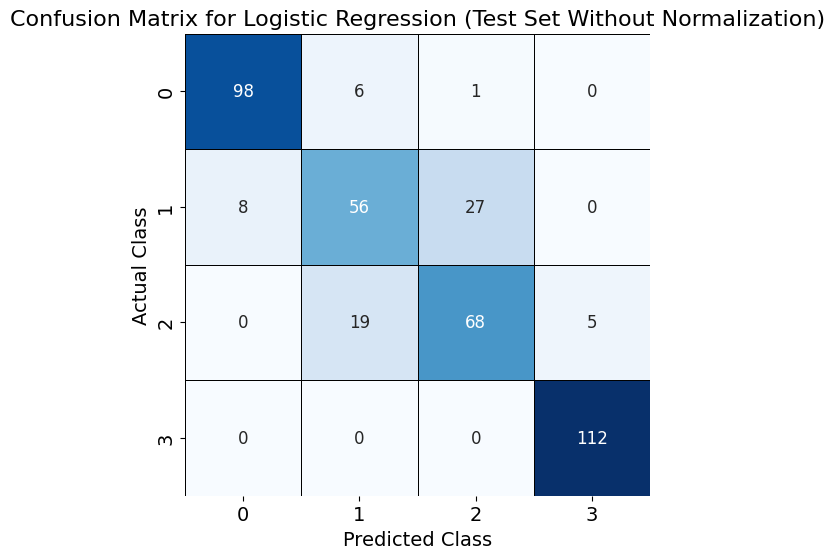

In [120]:
# Generating and plotting the confusion matrix for the test set
conf_matrix_test2 = confusion_matrix(y_test, y_test_pred2)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix_test2, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=lr_classifier2.classes_, yticklabels=lr_classifier2.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for Logistic Regression (Test Set Without Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

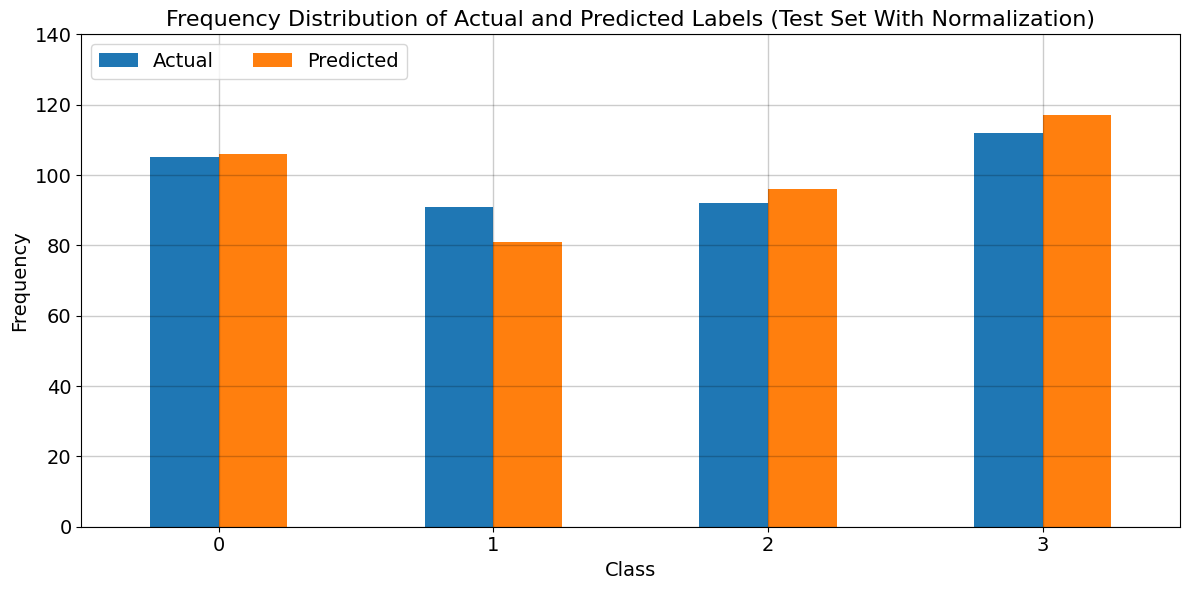

In [121]:
# Plotting the bar graph for frequency distribution of actual and predicted labels (Test Set)
actual_labels_test, actual_counts_test = np.unique(y_test, return_counts=True)
predicted_labels_test2, predicted_counts_test2 = np.unique(y_test_pred2, return_counts=True)

labels_test = np.unique(y_test)

x_test = np.arange(len(labels_test))
width = 0.25

fig, ax = plt.subplots(figsize=(12,6))
rects1_test = ax.bar(x_test - width/2, actual_counts_test, width, label='Actual')
rects2_test = ax.bar(x_test + width/2, predicted_counts_test2, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (Test Set With Normalization)', color='black', fontsize=16)
ax.set_xticks(x_test)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper left")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels_test) - 0.5]) 
plt.ylim((0,140))
fig.tight_layout()
plt.show()

## With Normalization

In [122]:
# Normalizing the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [123]:
# Splitting the dataset into training and testing subsets
X_train_normalized, X_test_normalized, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

### L1 Penalty

#### Determining the best value of C

In [124]:
# Lists to store the performance metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

In [125]:
# Perform cross-validation for each value of C
for C in C_values:
    lr_classifier = LogisticRegression(max_iter=500, random_state=42, C=C, penalty='l1', solver='liblinear')
    
    accuracy_cv = cross_val_score(lr_classifier, X_train_normalized, y_train, cv=5, scoring='accuracy')
    precision_cv = cross_val_score(lr_classifier, X_train_normalized, y_train, cv=5, scoring='precision_macro')
    recall_cv = cross_val_score(lr_classifier, X_train_normalized, y_train, cv=5, scoring='recall_macro')
    f1score_cv = cross_val_score(lr_classifier, X_train_normalized, y_train, cv=5, scoring='f1_macro')
    
    accuracy_scores.append(np.mean(accuracy_cv))
    precision_scores.append(np.mean(precision_cv))
    recall_scores.append(np.mean(recall_cv))
    f1_scores.append(np.mean(f1score_cv))

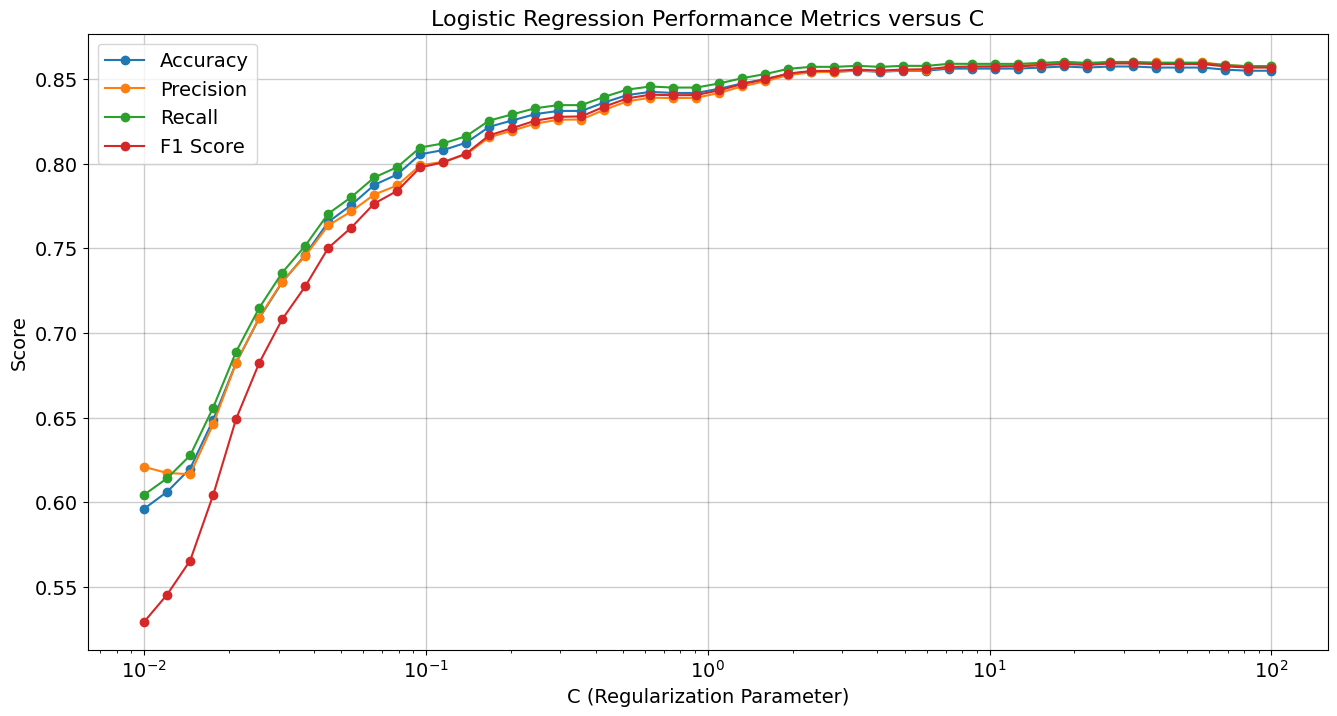

In [126]:
# Plot the results
plt.figure(figsize=(16,8))

plt.plot(C_values, accuracy_scores, label='Accuracy', marker='o')
plt.plot(C_values, precision_scores, label='Precision', marker='o')
plt.plot(C_values, recall_scores, label='Recall', marker='o')
plt.plot(C_values, f1_scores, label='F1 Score', marker='o')

plt.xscale('log')
plt.xlabel('C (Regularization Parameter)',color='black',fontsize=14)
plt.ylabel('Score',color='black',fontsize=14)
plt.title('Logistic Regression Performance Metrics versus C',color='black',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14, ncol=1, loc="upper left")
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

In [127]:
best_C1_ind = accuracy_scores.index(max(accuracy_scores))
best_C2_ind = precision_scores.index(max(precision_scores))
best_C3_ind = recall_scores.index(max(recall_scores))
best_C4_ind = f1_scores.index(max(f1_scores))

best_C = C_values[max(best_C1_ind,best_C2_ind,best_C3_ind,best_C4_ind)]
best_C

18.420699693267146

In [128]:
# Logistic Regression
lr_classifier3 = LogisticRegression(max_iter=500, random_state=42, C=best_C, penalty='l1', solver='liblinear')

In [129]:
# Cross-validation and its performance metrics
accuracy_cv3 = cross_val_score(lr_classifier3, X_train_normalized, y_train, cv=5, scoring='accuracy')
precision_cv3 = cross_val_score(lr_classifier3, X_train_normalized, y_train, cv=5, scoring='precision_macro')
recall_cv3 = cross_val_score(lr_classifier3, X_train_normalized, y_train, cv=5, scoring='recall_macro')
f1score_cv3 = cross_val_score(lr_classifier3, X_train_normalized, y_train, cv=5, scoring='f1_macro')

acc_cv3 = round(np.mean(accuracy_cv3)*100,3)
pre_cv3 = round(np.mean(precision_cv3)*100,3)
rec_cv3 = round(np.mean(recall_cv3)*100,3)
f1_cv3 = round(np.mean(f1score_cv3)*100,3)

print('Cross-Validation Accuracy (With Normalization):',acc_cv3,'%')
print('Cross-Validation Precision (With Normalization):',pre_cv3,'%')
print('Cross-Validation Recall (With Normalization):',rec_cv3,'%')
print('Cross-Validation F1 Score (With Normalization):',f1_cv3,'%')

Cross-Validation Accuracy (With Normalization): 85.75 %
Cross-Validation Precision (With Normalization): 85.942 %
Cross-Validation Recall (With Normalization): 86.026 %
Cross-Validation F1 Score (With Normalization): 85.898 %


In [130]:
# Making predictions on the test set
lr_classifier3.fit(X_train_normalized, y_train)
y_test_pred3 = lr_classifier3.predict(X_test_normalized)

In [131]:
# Evaluating the classifier on the test set
accuracy_test3 = accuracy_score(y_test, y_test_pred3)
precision_test3 = precision_score(y_test, y_test_pred3, average='macro')
recall_test3 = recall_score(y_test, y_test_pred3, average='macro')
f1score_test3 = f1_score(y_test, y_test_pred3, average='macro')

acc_tst3 = round(np.mean(accuracy_test3)*100,3)
pre_tst3 = round(np.mean(precision_test3)*100,3)
rec_tst3 = round(np.mean(recall_test3)*100,3)
f1_tst3 = round(np.mean(f1score_test3)*100,3)

print('Test Accuracy (With Normalization):',acc_tst3,'%')
print('Test Precision (With Normalization):',pre_tst3,'%')
print('Test Recall (With Normalization):',rec_tst3,'%')
print('Test F1 Score (With Normalization):',f1_tst3,'%')

Test Accuracy (With Normalization): 88.25 %
Test Precision (With Normalization): 87.598 %
Test Recall (With Normalization): 87.376 %
Test F1 Score (With Normalization): 87.429 %


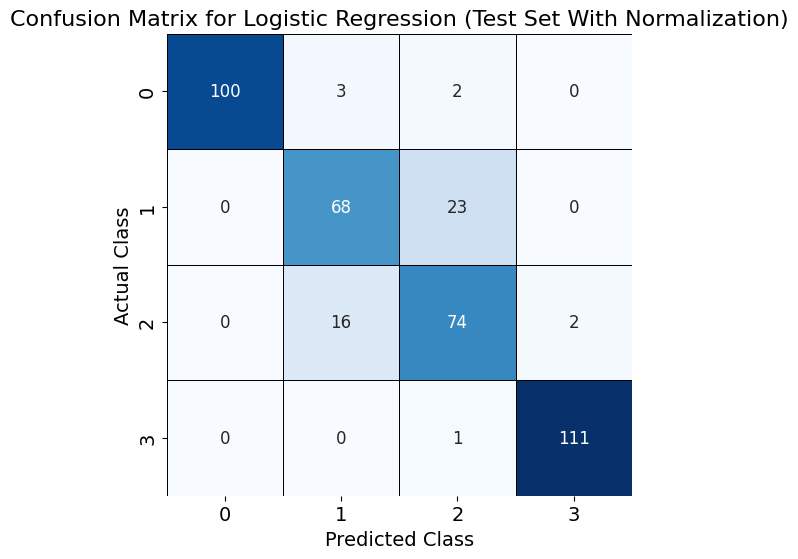

In [132]:
# Generating and plotting the confusion matrix for the test set
conf_matrix_test3 = confusion_matrix(y_test, y_test_pred3)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix_test3, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=lr_classifier3.classes_, yticklabels=lr_classifier3.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for Logistic Regression (Test Set With Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

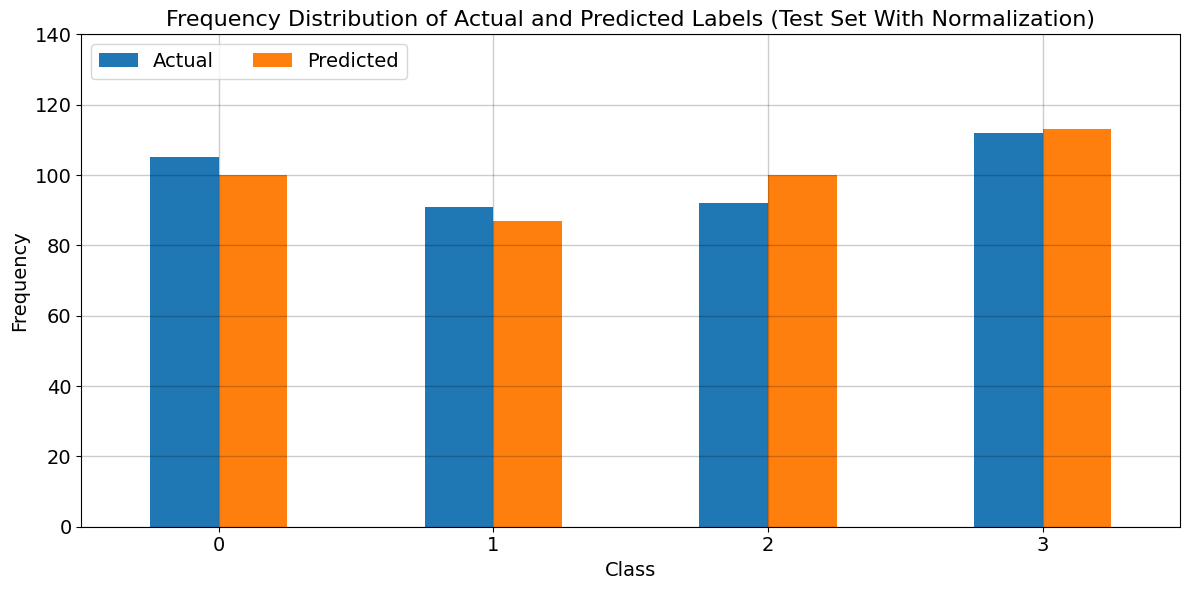

In [133]:
# Plotting the bar graph for frequency distribution of actual and predicted labels (Test Set)
actual_labels_test, actual_counts_test = np.unique(y_test, return_counts=True)
predicted_labels_test3, predicted_counts_test3 = np.unique(y_test_pred3, return_counts=True)

labels_test = np.unique(y_test)

x_test = np.arange(len(labels_test))
width = 0.25

fig, ax = plt.subplots(figsize=(12,6))
rects1_test = ax.bar(x_test - width/2, actual_counts_test, width, label='Actual')
rects2_test = ax.bar(x_test + width/2, predicted_counts_test3, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (Test Set With Normalization)', color='black', fontsize=16)
ax.set_xticks(x_test)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper left")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels_test) - 0.5]) 
plt.ylim((0,140))
fig.tight_layout()
plt.show()

### L2 Penalty

#### Determining the best value of C

In [134]:
# Lists to store the performance metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

In [135]:
# Perform cross-validation for each value of C
for C in C_values:
    lr_classifier = LogisticRegression(max_iter=500, random_state=42, C=C, penalty='l2', solver='liblinear')
    
    accuracy_cv = cross_val_score(lr_classifier, X_train_normalized, y_train, cv=5, scoring='accuracy')
    precision_cv = cross_val_score(lr_classifier, X_train_normalized, y_train, cv=5, scoring='precision_macro')
    recall_cv = cross_val_score(lr_classifier, X_train_normalized, y_train, cv=5, scoring='recall_macro')
    f1score_cv = cross_val_score(lr_classifier, X_train_normalized, y_train, cv=5, scoring='f1_macro')
    
    accuracy_scores.append(np.mean(accuracy_cv))
    precision_scores.append(np.mean(precision_cv))
    recall_scores.append(np.mean(recall_cv))
    f1_scores.append(np.mean(f1score_cv))

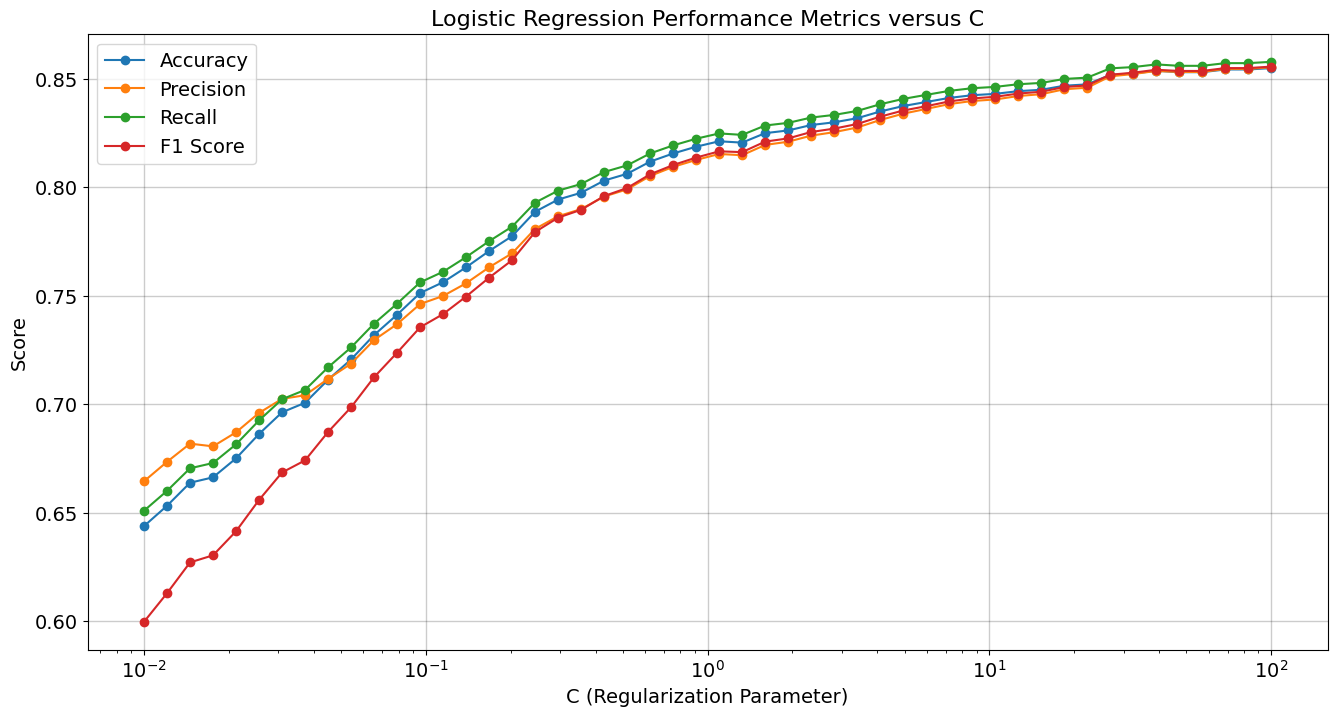

In [136]:
# Plot the results
plt.figure(figsize=(16,8))

plt.plot(C_values, accuracy_scores, label='Accuracy', marker='o')
plt.plot(C_values, precision_scores, label='Precision', marker='o')
plt.plot(C_values, recall_scores, label='Recall', marker='o')
plt.plot(C_values, f1_scores, label='F1 Score', marker='o')

plt.xscale('log')
plt.xlabel('C (Regularization Parameter)',color='black',fontsize=14)
plt.ylabel('Score',color='black',fontsize=14)
plt.title('Logistic Regression Performance Metrics versus C',color='black',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14, ncol=1, loc="upper left")
plt.grid(True, linewidth=1, color='black', alpha=0.2)
plt.show()

In [137]:
best_C1_ind = accuracy_scores.index(max(accuracy_scores))
best_C2_ind = precision_scores.index(max(precision_scores))
best_C3_ind = recall_scores.index(max(recall_scores))
best_C4_ind = f1_scores.index(max(f1_scores))

best_C = C_values[max(best_C1_ind,best_C2_ind,best_C3_ind,best_C4_ind)]
best_C

100.0

In [138]:
# Logistic Regression
lr_classifier4 = LogisticRegression(max_iter=500, random_state=42, C=best_C, penalty='l2', solver='liblinear')

In [139]:
# Cross-validation and its performance metrics
accuracy_cv4 = cross_val_score(lr_classifier4, X_train_normalized, y_train, cv=5, scoring='accuracy')
precision_cv4 = cross_val_score(lr_classifier4, X_train_normalized, y_train, cv=5, scoring='precision_macro')
recall_cv4 = cross_val_score(lr_classifier4, X_train_normalized, y_train, cv=5, scoring='recall_macro')
f1score_cv4 = cross_val_score(lr_classifier4, X_train_normalized, y_train, cv=5, scoring='f1_macro')

acc_cv4 = round(np.mean(accuracy_cv4)*100,3)
pre_cv4 = round(np.mean(precision_cv4)*100,3)
rec_cv4 = round(np.mean(recall_cv4)*100,3)
f1_cv4 = round(np.mean(f1score_cv4)*100,3)

print('Cross-Validation Accuracy (With Normalization):',acc_cv4,'%')
print('Cross-Validation Precision (With Normalization):',pre_cv4,'%')
print('Cross-Validation Recall (With Normalization):',rec_cv4,'%')
print('Cross-Validation F1 Score (With Normalization):',f1_cv4,'%')

Cross-Validation Accuracy (With Normalization): 85.5 %
Cross-Validation Precision (With Normalization): 85.541 %
Cross-Validation Recall (With Normalization): 85.79 %
Cross-Validation F1 Score (With Normalization): 85.57 %


In [140]:
# Making predictions on the test set
lr_classifier4.fit(X_train_normalized, y_train)
y_test_pred4 = lr_classifier4.predict(X_test_normalized)

In [141]:
# Evaluating the classifier on the test set
accuracy_test4 = accuracy_score(y_test, y_test_pred4)
precision_test4 = precision_score(y_test, y_test_pred4, average='macro')
recall_test4 = recall_score(y_test, y_test_pred4, average='macro')
f1score_test4 = f1_score(y_test, y_test_pred4, average='macro')

acc_tst4 = round(np.mean(accuracy_test4)*100,3)
pre_tst4 = round(np.mean(precision_test4)*100,3)
rec_tst4 = round(np.mean(recall_test4)*100,3)
f1_tst4 = round(np.mean(f1score_test4)*100,3)

print('Test Accuracy (With Normalization):',acc_tst4,'%')
print('Test Precision (With Normalization):',pre_tst4,'%')
print('Test Recall (With Normalization):',rec_tst4,'%')
print('Test F1 Score (With Normalization):',f1_tst4,'%')

Test Accuracy (With Normalization): 88.25 %
Test Precision (With Normalization): 87.505 %
Test Recall (With Normalization): 87.343 %
Test F1 Score (With Normalization): 87.384 %


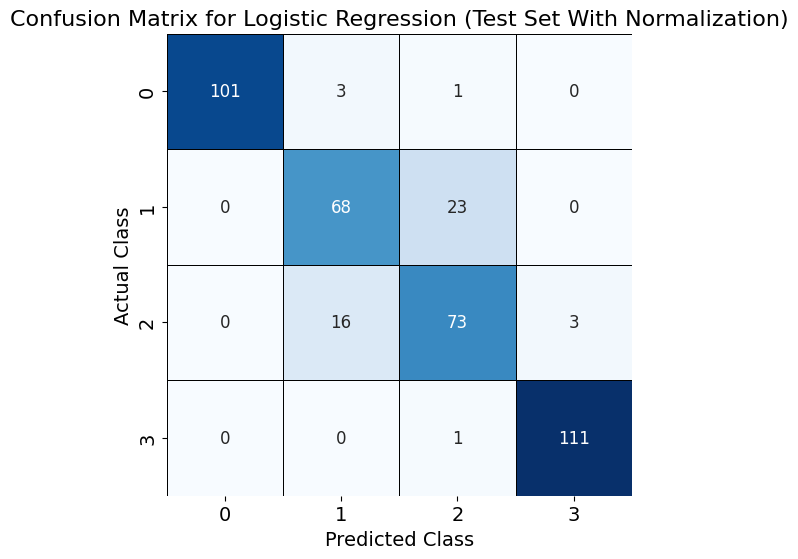

In [142]:
# Generating and plotting the confusion matrix for the test set
conf_matrix_test4 = confusion_matrix(y_test, y_test_pred4)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix_test4, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=lr_classifier4.classes_, yticklabels=lr_classifier4.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for Logistic Regression (Test Set With Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

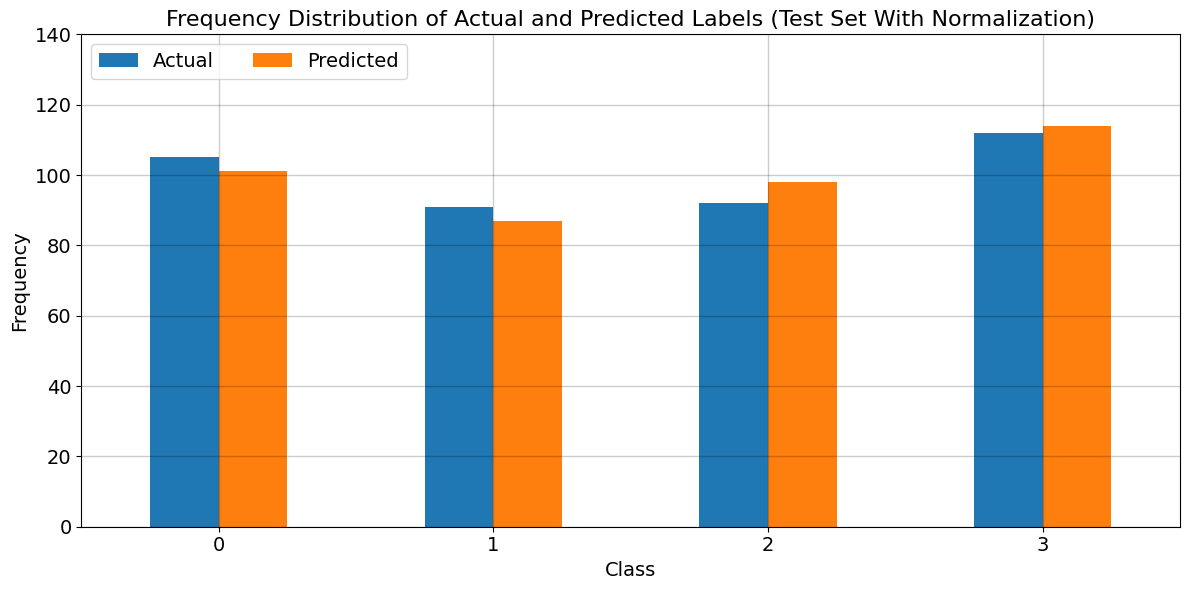

In [143]:
# Plotting the bar graph for frequency distribution of actual and predicted labels (Test Set)
actual_labels_test, actual_counts_test = np.unique(y_test, return_counts=True)
predicted_labels_test4, predicted_counts_test4 = np.unique(y_test_pred4, return_counts=True)

labels_test = np.unique(y_test)

x_test = np.arange(len(labels_test))
width = 0.25

fig, ax = plt.subplots(figsize=(12,6))
rects1_test = ax.bar(x_test - width/2, actual_counts_test, width, label='Actual')
rects2_test = ax.bar(x_test + width/2, predicted_counts_test4, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (Test Set With Normalization)', color='black', fontsize=16)
ax.set_xticks(x_test)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper left")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels_test) - 0.5]) 
plt.ylim((0,140))
fig.tight_layout()
plt.show()

***